In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

(512, 512, 3)


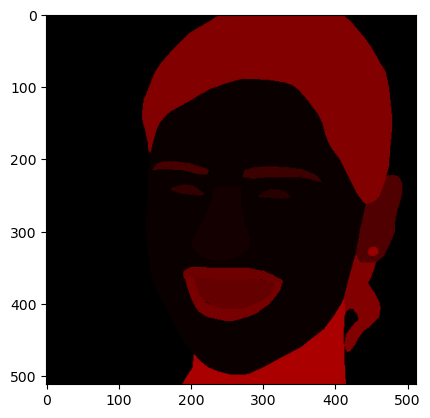

In [234]:
ig = plt.imread('C:\\Users\\werng\\Desktop\\Combined mask train\\combined_mask305.jpeg')
x = np.zeros((512, 512)).astype(np.uint8)
ig = cv2.merge([ig,x,x])
# ig = ig[:,:,np.newaxis]
plt.imshow(ig*10);
print(ig.shape)
# print(ig[250][200][0])

In [57]:
ig[378][250][0]

0.043137256

In [58]:
# image = cv2.imread("C:\\Users\\werng\\Desktop\\Red_cherry\\666.jpg") # For common fings
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # For common fings

In [3]:
#box, label, count = cv.detect_common_objects(image) # For common things

In [4]:
# output = draw_bbox(image, box, label, count) # For common things

In [5]:
# For common things
# print('\n',label, end='\n\n')
# print(f"Кол-во объектов: " + str(len(label)))
# plt.imshow(output)
# plt.show()

In [19]:
image = cv2.imread("C:\\DATA\\Computer Vision\\CelebAMask-HQ\\CelebAMask-HQ\\CelebAMask-HQ-mask-anno\\0\\00000_hair.png")
# 255 = 1 белое
# 0 = 0

(1791, 1087, 3)

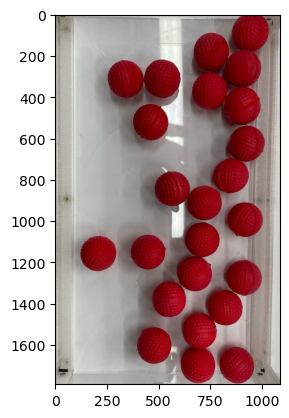

In [280]:
image = cv2.imread("C:\\Users\\werng\\Desktop\\Red_cherry\\24.jpg")
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap='gray');
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#image = cv2.medianBlur(image, 1+4)
plt.imshow(image);
image.shape

In [258]:
#(g, b, r)
no_red = (0, 50, 0)
red = (255, 255, 255)

mask = cv2.inRange(image, no_red, red)

In [259]:
cv2.imwrite('C:\\Users\\werng\\Desktop\\Red_cherry\\mask.jpg', mask)

True

In [260]:
image = cv2.imread("C:\\Users\\werng\\Desktop\\Red_cherry\\mask.jpg")

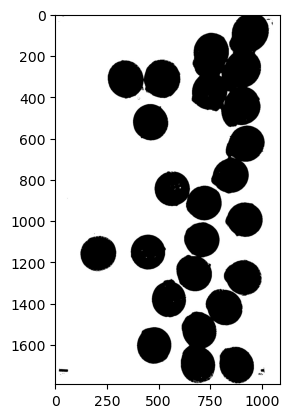

In [261]:
gray = image
plt.imshow(gray, cmap='gray');

In [272]:
canny = cv2.Canny(gray, 10, 150, 3)

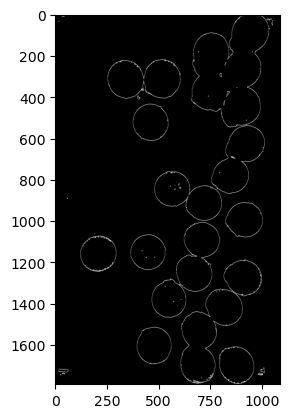

In [273]:
dilated = cv2.dilate(canny, (1, 1), iterations=1)
plt.imshow(dilated, cmap='gray');

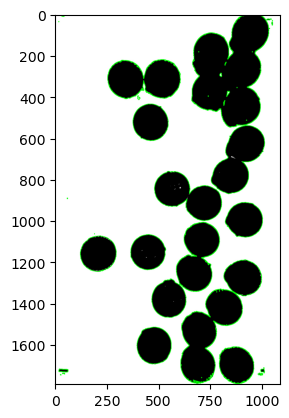

In [264]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
  
plt.imshow(rgb);

In [265]:
len(cnt)-1

62

In [225]:
def nothing(args):pass
# создаем окно для отображения результата и бегунки
cv2.namedWindow("setup")
cv2.createTrackbar("b1", "setup", 0, 255, nothing)
cv2.createTrackbar("g1", "setup", 0, 255, nothing)
cv2.createTrackbar("r1", "setup", 0, 255, nothing)
cv2.createTrackbar("b2", "setup", 255, 255, nothing)
cv2.createTrackbar("g2", "setup", 255, 255, nothing)
cv2.createTrackbar("r2", "setup", 255, 255, nothing)

fn = "C:\\Users\\werng\\Desktop\\Red_cherry\\13.jpg" # путь к файлу с картинкой
img = cv2.imread(fn) # загрузка изображения
    
while True:
    r1 = cv2.getTrackbarPos('r1', 'setup')
    g1 = cv2.getTrackbarPos('g1', 'setup')
    b1 = cv2.getTrackbarPos('b1', 'setup')
    r2 = cv2.getTrackbarPos('r2', 'setup')
    g2 = cv2.getTrackbarPos('g2', 'setup')
    b2 = cv2.getTrackbarPos('b2', 'setup')
    # собираем значения из бегунков в множества
    min_p = (g1, b1, r1)
    max_p = (g2, b2, r2)
    # применяем фильтр, делаем бинаризацию
    img_g = cv2.inRange(img, min_p, max_p)
  
    cv2.imshow('img', img_g)
    
    if cv2.waitKey(33) & 0xFF == ord('q'):
         break

cv2.destroyAllWindows()